In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json


#profile_transcript = pd.read_csv("/content/drive/MyDrive/marketing_analytics/ma_package/ma_data/profile_transcript.csv")
#portfolio = pd.read_csv("/content/drive/MyDrive/marketing_analytics/ma_package/ma_data/portfolio_updated.csv")

profile_transcript = pd.read_csv("/content/drive/MyDrive/Marketing Analytics/ma_data/profile_transcript.csv")
portfolio = pd.read_csv("/content/drive/MyDrive/Marketing Analytics/ma_data/portfolio_updated.csv")

profile_transcript.head()

,Unnamed: 0,gender,age,id,became_member_on,income,event,value,time,offer received,offer viewed,offer completed,transaction
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,1,0,1,1
1,1,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,0,1,0,0
2,2,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,1,0,1,1
3,3,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0,1,0,0
4,4,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,transaction,{'amount': 0.35000000000000003},360,0,0,0,0


In [ ]:
portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,duration_hours
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,168
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,120
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,96
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,168
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,240


Cleaning value feature

In [ ]:
import numpy as np

def offer_new(val):
  if 'amount' in val:
    return np.nan
  else:
    return val

def transaction_new(val):
  if 'amount' in val:
    return val
  else:
    return np.nan
  

def map_transaction(val):
  if val is not np.nan:
    return 1
  else:
    return 0

def reward_new(val):
  if 'reward' in val:
    return val
  else:
    return np.nan

In [ ]:
profile_transcript['offer_id']=profile_transcript['value'].apply(offer_new)
profile_transcript['transaction_amount']=profile_transcript['value'].apply(transaction_new)
profile_transcript.drop('transaction', axis=1, inplace=True)
profile_transcript['transaction']=profile_transcript['transaction_amount'].apply(map_transaction)

In [ ]:
profile_transcript.head()

,Unnamed: 0,gender,age,id,became_member_on,income,event,value,time,offer received,offer viewed,offer completed,offer_id,transaction_amount,transaction
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,1,0,1,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,0
1,1,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,0,1,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,0
2,2,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,1,0,1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0
3,3,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0,1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0
4,4,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,transaction,{'amount': 0.35000000000000003},360,0,0,0,NaN,{'amount': 0.35000000000000003},1


In [ ]:
profile_transcript['value'] = profile_transcript['value'].astype('str')
profile_transcript['offer_id'] = profile_transcript['offer_id'].astype('str')
profile_transcript.head()

,Unnamed: 0,gender,age,id,became_member_on,income,event,value,time,offer received,offer viewed,offer completed,offer_id,transaction_amount,transaction
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,1,0,1,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,0
1,1,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,0,1,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,0
2,2,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,1,0,1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0
3,3,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0,1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0
4,4,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,transaction,{'amount': 0.35000000000000003},360,0,0,0,nan,{'amount': 0.35000000000000003},1


In [ ]:
def strip_reward(val):
  if 'reward' in val:
    val = val[14:]
    return val
  else:
    return val

def strip_offer(val):
  val = val[:32]
  return val
'''
def get_reward(val):
  if val != 'nan':
    val = val[:12]
    return val
  else:
    return val'''

def get_reward(val):
  if 'reward' in val:
    val = val.replace("\'", "\"")
    x = json.loads(val)
    return x['reward']
  else:
    return 0

In [ ]:
def id_mapper(df_):
  coded_dict = dict()
  cter = 1
  id_encoded = []
  
  for val in df_['id']:
      if val not in coded_dict:
          coded_dict[val] = cter
          cter+=1
      
      id_encoded.append(coded_dict[val])
  return id_encoded

In [ ]:
profile_transcript['offer_id']=profile_transcript['offer_id'].apply(strip_reward)


In [ ]:
profile_transcript=profile_transcript.iloc[:,1:] # dropping unnamed column
profile_transcript.head()

,gender,age,id,became_member_on,income,event,value,time,offer received,offer viewed,offer completed,offer_id,transaction_amount,transaction
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,1,0,1,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,0
1,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,0,1,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,0
2,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,1,0,1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0
3,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0,1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0
4,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,transaction,{'amount': 0.35000000000000003},360,0,0,0,nan,{'amount': 0.35000000000000003},1


Cleaning offer id, transaction amount

In [ ]:
profile_transcript['offer_id'] = profile_transcript['offer_id'].str.replace("{'offer id': '", '')
profile_transcript['offer_id'] = profile_transcript['offer_id'].str.replace("'offer_id': '", '')
profile_transcript['offer_id'] = profile_transcript['offer_id'].str.replace("'}", '')

profile_transcript['transaction_amount'] = profile_transcript['transaction_amount'].astype('str')
profile_transcript['transaction_amount'] = profile_transcript['transaction_amount'].str.replace("{'amount': ", '')
profile_transcript['transaction_amount'] = profile_transcript['transaction_amount'].str.replace("}", '')

profile_transcript['reward_achieved'] = profile_transcript['value'].apply(reward_new)
profile_transcript['reward_achieved'] = profile_transcript['reward_achieved'].astype('str')

#profile_transcript['reward_achieved'] = profile_transcript['reward_achieved'].str.replace("{'offer id': '", '')
#profile_transcript['reward_achieved'] = profile_transcript['reward_achieved'].str.replace("'offer_id': '", '')
profile_transcript['reward_achieved'] = profile_transcript.reward_achieved.apply(get_reward)
#print(profile_transcript['reward_achieved'][14])
#profile_transcript['reward_achieved'] = profile_transcript['reward_achieved'].str.replace("{'reward': ", '')
#profile_transcript['reward_achieved'] = profile_transcript['reward_achieved'].str.replace('nan', '0')

profile_transcript['offer_id'] = profile_transcript['offer_id'].apply(strip_offer)

user_id_encoded = id_mapper(profile_transcript)
del profile_transcript['id']
profile_transcript['user_id'] = user_id_encoded

profile_transcript.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,gender,age,became_member_on,income,event,value,time,offer received,offer viewed,offer completed,offer_id,transaction_amount,transaction,reward_achieved,user_id
0,NaN,118,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,1,0,1,2906b810c7d4411798c6938adc9daaa5,nan,0,0,1
1,NaN,118,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,0,1,0,2906b810c7d4411798c6938adc9daaa5,nan,0,0,1
2,NaN,118,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,nan,0,0,1
3,NaN,118,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,nan,0,0,1
4,NaN,118,20170212,NaN,transaction,{'amount': 0.35000000000000003},360,0,0,0,nan,0.35000000000000003,1,0,1
5,NaN,118,20170212,NaN,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},408,1,0,1,fafdcd668e3743c1bb461111dcafc2a4,nan,0,0,1
6,NaN,118,20170212,NaN,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},408,0,1,0,fafdcd668e3743c1bb461111dcafc2a4,nan,0,0,1
7,NaN,118,20170212,NaN,transaction,{'amount': 0.74},414,0,0,0,nan,0.74,1,0,1
8,NaN,118,20170212,NaN,transaction,{'amount': 1.8900000000000001},444,0,0,0,nan,1.8900000000000001,1,0,1
9,NaN,118,20170212,NaN,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},504,1,0,1,2298d6c36e964ae4a3e7e9706d1fb8c2,nan,0,0,1


In [ ]:
portfolio['duration_hours'] = portfolio['duration'] * 24
portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,duration_hours
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,168
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,120
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,96
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,168
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,240
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,168
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,240
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,72
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,120
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,168


In [ ]:
import time
un_user_list = profile_transcript.user_id.unique().tolist()

test_list = []
trans_list = []
offer_list = []


for user in un_user_list:
    start = time.clock()
    df_id = profile_transcript[profile_transcript['user_id'] == user]
    list_transaction = df_id['transaction'].tolist()
    #for each transaction
    for i in list_transaction:
        if i == 0:
            test_list.append(i)
            trans_list.append(i)
            offer_list.append(str(i))
        if i == 1:
            idx = len(test_list)
            #get time of purchase, check which offer is viewed
            #the offer viewed is the one causing transaction
            test_time = df_id.loc[idx].time
            delta_time = test_time - portfolio.duration_hours.max()
            slice_df = df_id[(df_id['time'] >= delta_time) & (df_id['time'] < test_time)]
            slice_df.reset_index(inplace = True)
            list_offer_viewed = slice_df['offer viewed'].tolist()
            try:
                offer_id_purchased = slice_df.loc[list_offer_viewed.index(1)].offer_id
                trans_list.append(1)
                offer_list.append(offer_id_purchased)
                test_list.append(i)
            except:
                trans_list.append(0)
                offer_list.append(str(0))
                test_list.append(i)
    print("Calculating user {}... Time elapsed: {}".format(user, time.clock()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Streaming output truncated to the last 5000 lines.
Calculating user 12001... Time elapsed: 0.029276000000209024
Calculating user 12002... Time elapsed: 0.02101299999958428
Calculating user 12003... Time elapsed: 0.032194999999774154
Calculating user 12004... Time elapsed: 0.040899999999965075
Calculating user 12005... Time elapsed: 0.004813999999896623
Calculating user 12006... Time elapsed: 0.021757999999863387
Calculating user 12007... Time elapsed: 0.01880200000050536
Calculating user 12008... Time elapsed: 0.038528000000042084
Calculating user 12009... Time elapsed: 0.010978000000250177
Calculating user 12010... Time elapsed: 0.035091999999167456
Calculating user 12011... Time elapsed: 0.005263000000013562
Calculating user 12012... Time elapsed: 0.03752600000007078
Calculating user 12013... Time elapsed: 0.018834000000424567
Calculating user 12014... Time elapsed: 0.025150999999823398
Calculating user 12015... Time elapsed: 0.05968399999983376
Calculating user 12016... Time elapsed

One of the main problem of this data is that it doesn’t tell if a transaction happened because of an offer or not. And if it was, which offer causes the transaction? The first one is **transaction from offer** which hold the value of 1 or 0 based on whether a transaction was caused by an offer (1), or not (0). The second one is **transaction offer viewed** which holds the offer id causing transactions or ‘no transaction’ if there was no transaction during that time or the transaction was not caused by a specific offer.

In [ ]:
profile_transcript['transaction_from_offer'] = trans_list
profile_transcript['transaction_offer_viewed'] = offer_list
profile_transcript.head()

,gender,age,became_member_on,income,event,value,time,offer received,offer viewed,offer completed,offer_id,transaction_amount,transaction,reward_achieved,user_id,transaction_from_offer,transaction_offer_viewed
0,NaN,118,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,1,0,1,2906b810c7d4411798c6938adc9daaa5,nan,0,0,1,0,0
1,NaN,118,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,0,1,0,2906b810c7d4411798c6938adc9daaa5,nan,0,0,1,0,0
2,NaN,118,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,nan,0,0,1,0,0
3,NaN,118,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,nan,0,0,1,0,0
4,NaN,118,20170212,NaN,transaction,{'amount': 0.35000000000000003},360,0,0,0,nan,0.35000000000000003,1,0,1,1,2906b810c7d4411798c6938adc9daaa5


In [ ]:
#assign 0 to no transaction

portfolio_offer_id = portfolio.id.tolist()
portfolio_offer_name = ['bogo1', 'bogo2', 'informational1', 'bogo3', 'discount1', 'discount2', 'discount3', 'informational2', 'bogo4', 'discount4']
offer_name_dict = dict(zip(portfolio_offer_id, portfolio_offer_name))
print(offer_name_dict)
offer_name_dict['0'] = 'no transaction'

#merging df and portfolio
master_df = pd.merge(profile_transcript, portfolio, left_on = 'offer_id', right_on = 'id', how = 'left').sort_values(['user_id', 'time'])

#converting offer ids in transaction_offer_viewed to the names
master_df['transaction_offer_viewed'] = master_df.transaction_offer_viewed.map(offer_name_dict)


master_df.drop(['value','duration_hours', 'duration', 'id'], axis = 1, inplace = True)
master_df.transaction_offer_viewed.head(50)


{'ae264e3637204a6fb9bb56bc8210ddfd': 'bogo1', '4d5c57ea9a6940dd891ad53e9dbe8da0': 'bogo2', '3f207df678b143eea3cee63160fa8bed': 'informational1', '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'bogo3', '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'discount1', '2298d6c36e964ae4a3e7e9706d1fb8c2': 'discount2', 'fafdcd668e3743c1bb461111dcafc2a4': 'discount3', '5a8bc65990b245e5a138643cd4eb9837': 'informational2', 'f19421c1d4aa40978ebb69ca19b0e20d': 'bogo4', '2906b810c7d4411798c6938adc9daaa5': 'discount4'}


0     no transaction
1     no transaction
2     no transaction
3     no transaction
4          discount4
5     no transaction
6     no transaction
7          discount4
8          discount4
9     no transaction
10    no transaction
11         discount1
12         discount1
13         discount1
14    no transaction
15    no transaction
16    no transaction
17    no transaction
18         discount3
19         discount3
20         discount2
21    no transaction
22    no transaction
23    no transaction
24    no transaction
25    no transaction
26    no transaction
27    no transaction
28    no transaction
29    no transaction
30             bogo3
31    no transaction
32    no transaction
33    no transaction
34    no transaction
35    no transaction
36    informational2
37    no transaction
38    no transaction
39             bogo3
40    no transaction
41             bogo3
42    no transaction
43    no transaction
44             bogo3
45             bogo3
46    informational2
47    no tran

In [ ]:
#get dummies for offer_type
df_new = pd.concat([master_df, pd.get_dummies(master_df['offer_type'])], axis = 1).copy()

#cleaning transaction_amount
df_new['transaction_amount'] = df_new.transaction_amount.astype('float')
df_new['transaction_amount'].fillna(0, inplace = True)

#cleaning reward_achieved
df_new['reward_achieved'] = df_new.reward_achieved.astype('float')

In [ ]:
df_new.to_csv('/content/drive/MyDrive/Marketing Analytics/ma_data/master_df.csv', index = False)


In [ ]:
# df_new.to_csv('master_df.csv', index = False)

#df_new = pd.read_csv('/content/drive/MyDrive/marketing_analytics/ma_package/master_df.csv')
df_new = pd.read_csv('/content/drive/MyDrive/Marketing Analytics/ma_data/master_df.csv')
df_new[['age', 'income', 'transaction_amount']].describe()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    272762 non-null  object 
 1   age                       306534 non-null  int64  
 2   became_member_on          306534 non-null  int64  
 3   income                    272762 non-null  float64
 4   event                     306534 non-null  object 
 5   time                      306534 non-null  int64  
 6   offer received            306534 non-null  int64  
 7   offer viewed              306534 non-null  int64  
 8   offer completed           306534 non-null  int64  
 9   offer_id                  167581 non-null  object 
 10  transaction_amount        306534 non-null  float64
 11  transaction               306534 non-null  int64  
 12  reward_achieved           306534 non-null  float64
 13  user_id                   306534 non-null  i

In [ ]:
df_new[df_new['transaction_amount'] > 1000]

,gender,age,became_member_on,income,event,time,offer received,offer viewed,offer completed,offer_id,...,channels,difficulty,offer_type,email,mobile,social,web,bogo,discount,informational
48251,F,58,20150806,110000.0,transaction,630,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
56439,F,55,20180303,97000.0,transaction,102,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
280619,F,53,20180329,89000.0,transaction,690,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
#splitting df_new to 2 dataframes: one contains null values for income and gender, the other one doesn't
df_ml_test = df_new[df_new['income'].isnull()].copy()
df_ml_train = df_new.dropna(axis = 0, subset = ['income']).copy()
df_ml_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33772 entries, 0 to 306459
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    0 non-null      object 
 1   age                       33772 non-null  int64  
 2   became_member_on          33772 non-null  int64  
 3   income                    0 non-null      float64
 4   event                     33772 non-null  object 
 5   time                      33772 non-null  int64  
 6   offer received            33772 non-null  int64  
 7   offer viewed              33772 non-null  int64  
 8   offer completed           33772 non-null  int64  
 9   offer_id                  18776 non-null  object 
 10  transaction_amount        33772 non-null  float64
 11  transaction               33772 non-null  int64  
 12  reward_achieved           33772 non-null  float64
 13  user_id                   33772 non-null  int64  
 14  trans

In [ ]:
import numpy as np
import math
import json

#import machine learning libraries
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score
from sklearn.model_selection import GridSearchCV
import joblib

#import clustering libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import time
% matplotlib inline

In [ ]:
def regress_result(actual,preds,model):
    print("MSE for " + model + " is:", mean_squared_error(actual, preds))
    print("R2 score for " + model + " is:", r2_score(actual, preds))
    print("MAE for " + model + " is:", mean_absolute_error(actual, preds))
    print('\n')

def random_forest(X_train, X_test, y_train, y_test):

    param_grid = {
    'max_depth': [50,100],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2,3],
    'n_estimators': [100,200]
    }
    
    rf = RandomForestRegressor()

    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, verbose = 2)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

    rf_mod = grid_search.best_estimator_

    rf_mod.fit(X_train, y_train)
    rf_pred = rf_mod.predict(X_test)
    regress_result(y_test, rf_pred, 'Random Forest')
    return rf_mod

In [ ]:
X = df_ml_train.drop(['gender', 'Unnamed: 0', 'channels', 'event', 'income', 'time', 'offer_type', 'offer_id','transaction_offer_viewed', 'age', 'reward_achieved'], axis = 1).copy()
y = df_ml_train['age'].copy()
X.fillna(0, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# print(X_test)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 21 to 306533
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   became_member_on        272762 non-null  int64  
 1   offer received          272762 non-null  int64  
 2   offer viewed            272762 non-null  int64  
 3   offer completed         272762 non-null  int64  
 4   transaction_amount      272762 non-null  float64
 5   transaction             272762 non-null  int64  
 6   user_id                 272762 non-null  int64  
 7   transaction_from_offer  272762 non-null  int64  
 8   reward                  272762 non-null  float64
 9   difficulty              272762 non-null  float64
 10  email                   272762 non-null  float64
 11  mobile                  272762 non-null  float64
 12  social                  272762 non-null  float64
 13  web                     272762 non-null  float64
 14  bogo               

In [ ]:
regress = RandomForestRegressor()
regress.fit(X_train, y_train)
y_pred = regress.predict(X_test)
regress_result(y_test, y_pred, 'Random Forest')
rf_age = random_forest(X_train, X_test, y_train, y_test)

MSE for Random Forest is: 63.986555509321214
R2 score for Random Forest is: 0.7926831712033044
MAE for Random Forest is: 4.606953788059319


Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.2min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.1min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time= 1.0min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time= 1.1min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time= 2.1min
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total tim

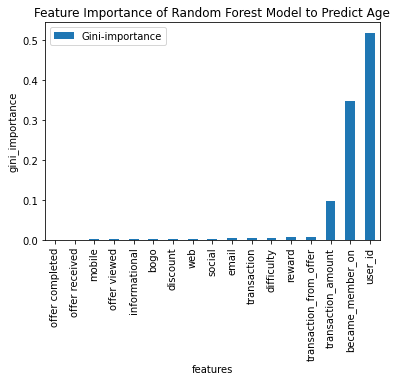

In [ ]:
joblib.dump(rf_age, '/content/drive/MyDrive/Marketing Analytics/ma_data/predict_age.sav')
rf_age = joblib.load('/content/drive/MyDrive/Marketing Analytics/ma_data/predict_age.sav')

# a dict to hold feature_name: feature_importance
feats = {} 
for feature, importance in zip(X.columns, rf_age.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.title('Feature Importance of Random Forest Model to Predict Age')
plt.xlabel('features')
plt.ylabel('gini_importance')
plt.show();

In [ ]:
#predict df_ml_test
X = df_ml_test.drop(['gender', 'Unnamed: 0', 'channels', 'event', 'income', 'time', 'offer_type', 'offer_id','transaction_offer_viewed', 'age', 'reward_achieved'], axis = 1).copy()
X.fillna(0, inplace = True)

In [ ]:
X['offer received'] = X['offer received'].astype('float')

In [ ]:
pred_age = np.round(rf_age.predict(X)).tolist()

In [ ]:
#replace age in df_ml_test to pred_age
df_ml_test['age'] = pred_age
df_ml_test['age'] = df_ml_test['age'].astype('int')

df_ml_test.head()

,gender,age,became_member_on,income,event,time,offer received,offer viewed,offer completed,offer_id,...,channels,difficulty,offer_type,email,mobile,social,web,bogo,discount,informational
0,NaN,61,20170212,NaN,offer received,168,1,0,1,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
1,NaN,61,20170212,NaN,offer viewed,216,0,1,0,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
2,NaN,61,20170212,NaN,offer received,336,1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
3,NaN,61,20170212,NaN,offer viewed,348,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
4,NaN,47,20170212,NaN,transaction,360,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


Predicting Income


In [ ]:
X = df_ml_train.drop(['gender', 'Unnamed: 0', 'channels', 'event', 'income', 'time', 'offer_type', 'offer_id','transaction_offer_viewed', 'age', 'reward_achieved'], axis = 1).copy()
y = df_ml_train['income'].copy()
X.fillna(0, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
regress = RandomForestRegressor()
regress.fit(X_train, y_train)
y_pred = regress.predict(X_test)
regress_result(y_test, y_pred, 'Random Forest')
#saving model
joblib.dump(regress, 'predict_income.sav')

MSE for Random Forest is: 127392714.09455025
R2 score for Random Forest is: 0.719415264924684
MAE for Random Forest is: 7299.329092808828




['predict_income.sav']

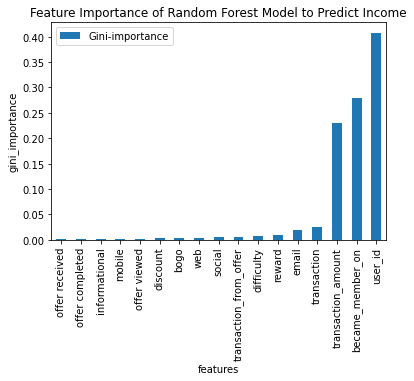

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, regress.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.title('Feature Importance of Random Forest Model to Predict Income')
plt.xlabel('features')
plt.ylabel('gini_importance')
plt.show();

In [ ]:
#loading model
regress = joblib.load('predict_income.sav')

In [ ]:
#predict df_ml_test income
X = df_ml_test.drop(['gender', 'Unnamed: 0', 'channels', 'event', 'income', 'time', 'offer_type', 'offer_id','transaction_offer_viewed', 'age', 'reward_achieved'], axis = 1).copy()
X.fillna(0, inplace = True)
income_pred = regress.predict(X)

df_ml_test['income'] = income_pred

#notice the income difference although the user id is the same
df_ml_test.head()


,gender,age,became_member_on,income,event,time,offer received,offer viewed,offer completed,offer_id,...,channels,difficulty,offer_type,email,mobile,social,web,bogo,discount,informational
0,NaN,61,20170212,87420.0,offer received,168,1,0,1,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
1,NaN,61,20170212,87300.0,offer viewed,216,0,1,0,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
2,NaN,61,20170212,87060.0,offer received,336,1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
3,NaN,61,20170212,86940.0,offer viewed,348,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
4,NaN,47,20170212,46600.0,transaction,360,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


Predicting Gender

In [ ]:
X = df_ml_train.drop(['gender', 'Unnamed: 0', 'channels', 'event', 'income', 'time', 'offer_type', 'offer_id','transaction_offer_viewed', 'age', 'reward_achieved'], axis = 1).copy()
y = df_ml_train['gender'].copy()

X.fillna(0, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(y_pred == y_test).mean()

0.7115649001888072

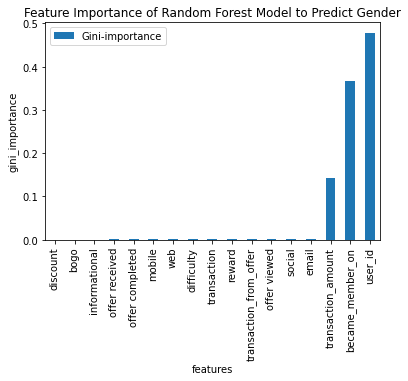

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.title('Feature Importance of Random Forest Model to Predict Gender')
plt.xlabel('features')
plt.ylabel('gini_importance')
plt.show();

In [ ]:
X = df_ml_test.drop(['gender', 'Unnamed: 0', 'channels', 'event', 'income', 'time', 'offer_type', 'offer_id','transaction_offer_viewed', 'age', 'reward_achieved'], axis = 1).copy()
X.fillna(0, inplace = True)
gender_pred = clf.predict(X)

df_ml_test['gender'] = gender_pred

df_ml_test.head()

,gender,age,became_member_on,income,event,time,offer received,offer viewed,offer completed,offer_id,...,channels,difficulty,offer_type,email,mobile,social,web,bogo,discount,informational
0,F,118,20170212,NaN,offer received,168,1,0,1,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
1,F,118,20170212,NaN,offer viewed,216,0,1,0,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
2,F,118,20170212,NaN,offer received,336,1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
3,F,118,20170212,NaN,offer viewed,348,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
4,F,118,20170212,NaN,transaction,360,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
df_test_edited = pd.DataFrame(columns = df_ml_test.columns)
user_list = list(df_ml_test.user_id.unique())

df_test_edited

,gender,age,became_member_on,income,event,time,offer received,offer viewed,offer completed,offer_id,...,channels,difficulty,offer_type,email,mobile,social,web,bogo,discount,informational


In [ ]:
#get mean of age and income, and mode of gender for each user
for user in user_list:
    start_time = time.clock()
    user_df = df_ml_test[df_ml_test['user_id'] == user]
    age = np.round(user_df.age.mean())
    income = user_df.income.mean()
    gender = user_df.gender.value_counts().idxmax()
    user_df['age'] = age
    user_df['income'] = income
    user_df['gender'] = gender
    df_test_edited = pd.concat([df_test_edited, user_df])
    print(time.clock() - start_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

0.01586700000007113
0.013007000000470725
0.009310999999797787
0.010833999999704247
0.01391200000034587
0.010476000000380736
0.010194999999839638
0.011075999999775377
0.012386999999762338
0.009258000000045286
0.010768999999527296
0.009221000000252388
0.011935999999877822
0.017651000000114436
0.00985800000034942
0.011741000000256463
0.009670000000369328
0.012161999999989348
0.01501300000018091
0.015264999999999418
0.014197999999851163
0.010283000000526954
0.012752999999975145
0.01271900000028836
0.01020299999981944
0.010505000000193832
0.0182569999997213
0.023405999999340565
0.013742999999521999
0.017872000000352273
0.011488000000099419
0.009382999999616004
0.010135999999874912
0.009444000000257802
0.01007099999969796
0.00974099999984901
0.018685000000004948
0.01225700000031793
0.012141000000156055
0.014110000000073342
0.0108090000003358
0.01378500000009808
0.012679000000389351
0.015149000000747037
0.017538000000058673
0.013923999999860825
0.01507199999923614
0.01572200000009616
0.013236

In [ ]:
df_test_edited.head(100)

,gender,age,became_member_on,income,event,time,offer received,offer viewed,offer completed,offer_id,...,channels,difficulty,offer_type,email,mobile,social,web,bogo,discount,informational
0,F,118.0,20170212,NaN,offer received,168,1,0,1,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
1,F,118.0,20170212,NaN,offer viewed,216,0,1,0,2906b810c7d4411798c6938adc9daaa5,...,"['web', 'email', 'mobile']",10.0,discount,1.0,1.0,0.0,1.0,0,1,0
2,F,118.0,20170212,NaN,offer received,336,1,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
3,F,118.0,20170212,NaN,offer viewed,348,0,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"['web', 'email']",20.0,discount,1.0,0.0,0.0,1.0,0,1,0
4,F,118.0,20170212,NaN,transaction,360,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,F,118.0,20150919,NaN,offer viewed,174,0,1,0,f19421c1d4aa40978ebb69ca19b0e20d,...,"['web', 'email', 'mobile', 'social']",5.0,bogo,1.0,1.0,1.0,1.0,1,0,0
152,F,118.0,20150919,NaN,transaction,210,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
153,F,118.0,20150919,NaN,transaction,264,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
154,F,118.0,20150919,NaN,offer received,336,1,0,1,ae264e3637204a6fb9bb56bc8210ddfd,...,"['email', 'mobile', 'social']",10.0,bogo,1.0,1.0,1.0,0.0,1,0,0


In [ ]:
#concating the cleaned dataframe to df_ml_train
df_use = pd.concat([df_ml_train, df_test_edited]).sort_values(['user_id', 'time'])

df_use.to_csv('/content/drive/MyDrive/Marketing Analytics/ma_data/df_use.csv', index = False)

In [ ]:
df_use = pd.read_csv("/content/drive/MyDrive/Marketing Analytics/ma_data/df_use.csv")

FEATURE ENGINEEREING

In [ ]:
#replacing no transaction with transaction_not_from_offer
index_list = df_use[(df_use['transaction'] == 1) & (df_use['transaction_offer_viewed'] == 'no transaction' )]['transaction_offer_viewed'].index.tolist()
df_use.loc[index_list, 'transaction_offer_viewed'] = 'transaction_not_from_offer'
df_use['transaction_offer_viewed'].value_counts()

no transaction                167581
transaction_not_from_offer     22423
discount3                      18139
discount2                      15500
bogo1                          15348
bogo2                          14010
bogo4                          13775
informational2                 11620
bogo3                           8173
discount4                       8105
informational1                  6705
discount1                       5155
Name: transaction_offer_viewed, dtype: int64

In [ ]:
#get dummy variables of transaction_offer_viewed
df_use = pd.concat([df_use, pd.get_dummies(df_use['transaction_offer_viewed'])], axis = 1)
df_use = df_use.rename(columns = {'no transaction': 'no_transaction'})

#creating user_demographic dataframe
user_demographic = df_use.groupby('user_id', as_index = False).agg({
    'age':'mean',
    'gender': 'first',
    'income': 'mean',
    'transaction_from_offer': 'sum',
    'offer completed': 'sum',
    'offer received': 'sum',
    'reward_achieved': 'sum',
    'transaction_amount': 'sum',
    'transaction': 'sum',
    'bogo1': 'sum',
    'bogo2': 'sum',
    'bogo3': 'sum',
    'bogo4': 'sum',
    'discount1': 'sum',
    'discount2': 'sum',
    'discount3': 'sum',
    'discount4': 'sum',
    'informational1': 'sum',
    'informational2': 'sum',
    'transaction_not_from_offer': 'sum'})

user_demographic.head()

,user_id,age,gender,income,transaction_from_offer,offer completed,offer received,reward_achieved,transaction_amount,transaction,...,bogo2,bogo3,bogo4,discount1,discount2,discount3,discount4,informational1,informational2,transaction_not_from_offer
0,1,118.0,F,NaN,9,5,5,5.0,20.40,9,...,0,0,0,3,1,2,3,0,0,0
1,2,55.0,F,112000.0,0,2,2,5.0,77.01,3,...,0,0,0,0,0,0,0,0,0,3
2,3,118.0,M,NaN,2,2,2,0.0,14.30,6,...,0,1,0,0,0,0,0,0,1,4
3,4,75.0,F,100000.0,7,4,4,20.0,159.27,7,...,0,4,0,0,0,0,0,0,1,0
4,5,118.0,F,NaN,1,5,5,0.0,4.65,3,...,0,0,0,1,0,0,0,0,0,2


In [ ]:
#re-arranging columns
user_demographic = user_demographic[['user_id', 'age', 'gender', 'income', 'offer received', 'offer completed', 'reward_achieved','transaction', 'transaction_from_offer', 'transaction_amount', 'informational1', 'informational2', 'bogo1', 'bogo2', 'bogo3', 'bogo4', 'discount1', 'discount2', 'discount3', 'discount4', 'transaction_not_from_offer']]

#create ratio columns
user_demographic['perc_offer_completed'] = user_demographic['offer completed'] / user_demographic['offer received']
user_demographic['trans_from_offer_ratio'] = user_demographic['transaction_from_offer'] / user_demographic['offer received']
user_demographic['trans_not_from_offer_ratio'] = user_demographic['transaction_not_from_offer'] / user_demographic['offer received']

#replace inf values to 999
user_demographic = user_demographic.replace([np.inf, -np.inf], 999)

#dropping columns that are not needed
user_demographic.drop(['offer completed', 'offer received'], axis = 1, inplace = True)

user_demographic.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

user_id                          0
age                              0
gender                           0
income                        2175
reward_achieved                  0
transaction                      0
transaction_from_offer           0
transaction_amount               0
informational1                   0
informational2                   0
bogo1                            0
bogo2                            0
bogo3                            0
bogo4                            0
discount1                        0
discount2                        0
discount3                        0
discount4                        0
transaction_not_from_offer       0
perc_offer_completed             6
trans_from_offer_ratio           6
trans_not_from_offer_ratio       0
dtype: int64

In [ ]:
user_demographic.fillna(0, inplace = True)

### DATA VISUALIZATION

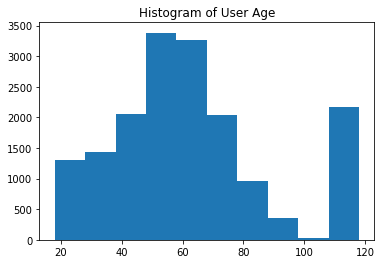

In [ ]:
#plotting age
plt.hist(user_demographic.age)
plt.title('Histogram of User Age')
plt.show();

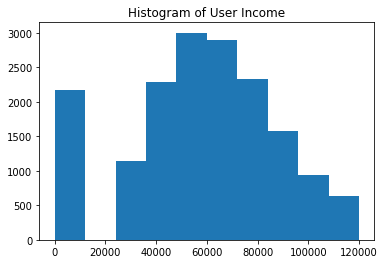

In [ ]:
plt.hist(user_demographic.income)
plt.title('Histogram of User Income')
plt.show();

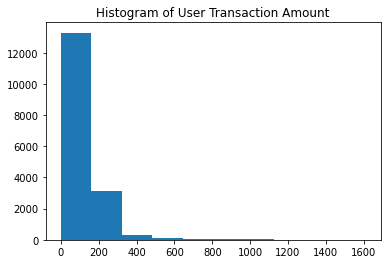

In [ ]:
plt.hist(user_demographic.transaction_amount)
plt.title('Histogram of User Transaction Amount')
plt.show();

In [ ]:
profile = pd.read_csv('/content/drive/MyDrive/Marketing Analytics/ma_data/profile_new.csv')

In [ ]:
def id_mapper(df):
    coded_dict = dict()
    cter = 1
    id_encoded = []
    
    for val in df['id']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        id_encoded.append(coded_dict[val])
    return id_encoded

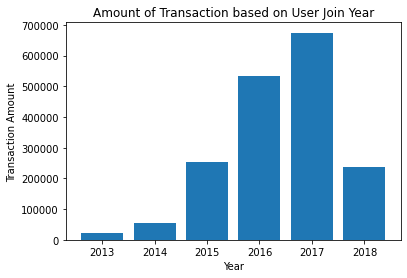

In [ ]:
profile['user_id'] = id_mapper(profile)
user_demographic['became_member_on'] = profile['became_member_on']
user_demographic['join_year'] = user_demographic.became_member_on.apply(lambda x: int(str(x)[:4]))
transaction_per_year = user_demographic.groupby('join_year', as_index = False)['transaction_amount'].agg('sum')
plt.bar(transaction_per_year.join_year, transaction_per_year.transaction_amount)
plt.title('Amount of Transaction based on User Join Year')
plt.xlabel('Year')
plt.ylabel('Transaction Amount')
plt.show();

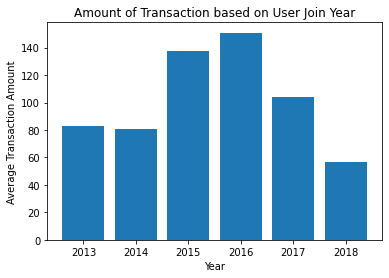

In [ ]:
avg_transaction_per_year = user_demographic.groupby('join_year', as_index = False)['transaction_amount'].agg('mean')
plt.bar(avg_transaction_per_year.join_year, avg_transaction_per_year.transaction_amount)
plt.title('Amount of Transaction based on User Join Year')
plt.xlabel('Year')
plt.ylabel('Average Transaction Amount')
plt.show();

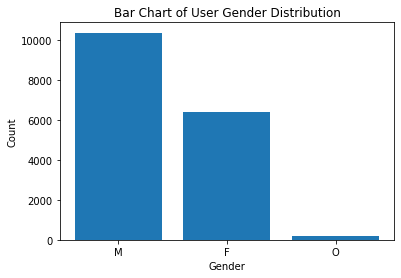

In [ ]:
plt.bar(['M', 'F', 'O'],user_demographic.gender.value_counts().tolist())
plt.title('Bar Chart of User Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

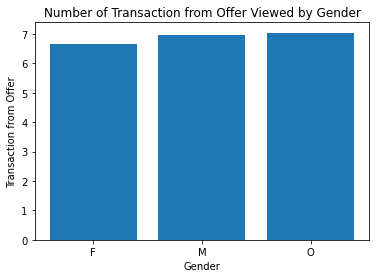

In [ ]:
gender_offer = user_demographic.groupby('gender', as_index = False).agg({'transaction_from_offer': 'mean'})
plt.bar(gender_offer.gender.tolist(), gender_offer.transaction_from_offer.tolist())
plt.title('Number of Transaction from Offer Viewed by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction from Offer')
plt.show();

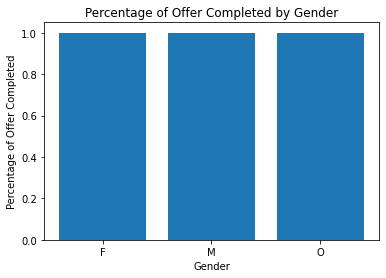

In [ ]:
gender_offer_completed = user_demographic.groupby('gender', as_index = False).agg({'perc_offer_completed': 'mean'})
plt.bar(gender_offer_completed.gender.tolist(), gender_offer_completed.perc_offer_completed.tolist())
plt.title('Percentage of Offer Completed by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Offer Completed')
plt.show();

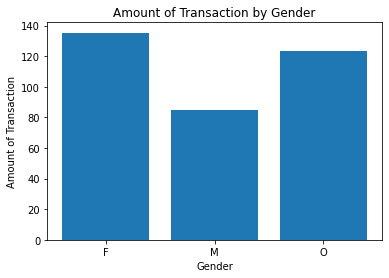

In [ ]:
gender_trans_amount = user_demographic.groupby('gender', as_index = False).agg({'transaction_amount': 'mean'})
plt.bar(gender_trans_amount.gender.tolist(), gender_trans_amount.transaction_amount.tolist())
plt.title('Amount of Transaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount of Transaction')
plt.show();

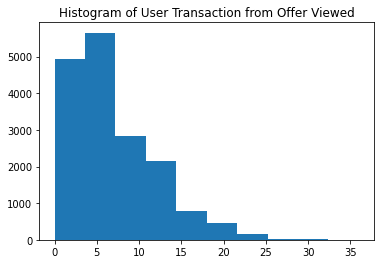

In [ ]:
plt.hist(user_demographic.transaction_from_offer)
plt.title('Histogram of User Transaction from Offer Viewed')
plt.show();

### CLUSTERING

In [ ]:
user_cluster = pd.concat([user_demographic,pd.get_dummies(user_demographic.gender)], axis = 1).copy()
user_cluster.drop(['gender', 'user_id','join_year'], axis = 1, inplace = True)

In [ ]:
user_cluster

,age,income,reward_achieved,transaction,transaction_from_offer,transaction_amount,informational1,informational2,bogo1,bogo2,...,discount3,discount4,transaction_not_from_offer,perc_offer_completed,trans_from_offer_ratio,trans_not_from_offer_ratio,became_member_on,F,M,O
0,118.0,0.0,5.0,9,9,20.40,0,0,0,0,...,2,3,0,1.0,1.800000,0.000000,20170212,1,0,0
1,55.0,112000.0,5.0,3,0,77.01,0,0,0,0,...,0,0,3,1.0,0.000000,1.500000,20170715,1,0,0
2,118.0,0.0,0.0,6,2,14.30,0,1,0,0,...,0,0,4,1.0,1.000000,2.000000,20180712,0,1,0
3,75.0,100000.0,20.0,7,7,159.27,0,1,2,0,...,0,0,0,1.0,1.750000,0.000000,20170509,1,0,0
4,118.0,0.0,0.0,3,1,4.65,0,0,0,0,...,0,0,2,1.0,0.200000,0.400000,20170804,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,45.0,54000.0,0.0,7,2,20.03,0,1,0,1,...,0,0,5,1.0,0.666667,1.666667,20180604,1,0,0
16996,61.0,72000.0,5.0,7,3,25.97,0,3,0,0,...,0,0,4,1.0,1.000000,1.333333,20180713,0,1,0
16997,49.0,73000.0,0.0,8,3,39.74,0,3,0,0,...,0,0,5,1.0,1.000000,1.666667,20170126,0,1,0
16998,83.0,50000.0,25.0,14,11,189.67,0,0,0,7,...,0,0,3,1.0,3.666667,1.000000,20160307,1,0,0


In [ ]:
#scaling the data
scale = StandardScaler()
scale.fit(user_cluster)
data = scale.transform(user_cluster)
user_scaled = pd.DataFrame(data)
user_scaled.columns = user_cluster.columns
user_scaled.index = user_cluster.index
user_scaled.head()

,age,income,reward_achieved,transaction,transaction_from_offer,transaction_amount,informational1,informational2,bogo1,bogo2,...,discount3,discount4,transaction_not_from_offer,perc_offer_completed,trans_from_offer_ratio,trans_not_from_offer_ratio,became_member_on,F,M,O
0,2.074539,-1.918295,-0.507070,0.161509,0.429938,-0.667401,-0.317957,-0.419148,-0.431109,-0.437258,...,0.392164,1.735161,-0.880450,0.01879,0.221047,-0.037628,0.272135,1.284056,-1.250332,-0.11291
1,-0.281677,1.848542,-0.507070,-1.011260,-1.373751,-0.217826,-0.317957,-0.419148,-0.431109,-0.437258,...,-0.448487,-0.327858,1.122089,0.01879,-1.393856,0.042308,0.315211,1.284056,-1.250332,-0.11291
2,2.074539,-1.918295,-1.048023,-0.424876,-0.972931,-0.715844,-0.317957,0.194063,-0.431109,-0.437258,...,-0.448487,-0.327858,1.789602,0.01879,-0.496687,0.068953,1.171327,-0.778782,0.799788,-0.11291
3,0.466328,1.444952,1.115789,-0.229414,0.029118,0.435452,-0.317957,0.194063,0.523915,-0.437258,...,-0.448487,-0.327858,-0.880450,0.01879,0.176189,-0.037628,0.297570,1.284056,-1.250332,-0.11291
4,2.074539,-1.918295,-1.048023,-1.011260,-1.173341,-0.792481,-0.317957,-0.419148,-0.431109,-0.437258,...,-0.448487,-0.327858,0.454576,0.01879,-1.214422,-0.016312,0.322833,1.284056,-1.250332,-0.11291


In [ ]:
scores = []
k_list = list(range(1,user_scaled.shape[1]+1))
for k in k_list:
    kmeans = KMeans(k)
    model = kmeans.fit(user_scaled)
    scores.append(np.abs(model.score(user_scaled)))

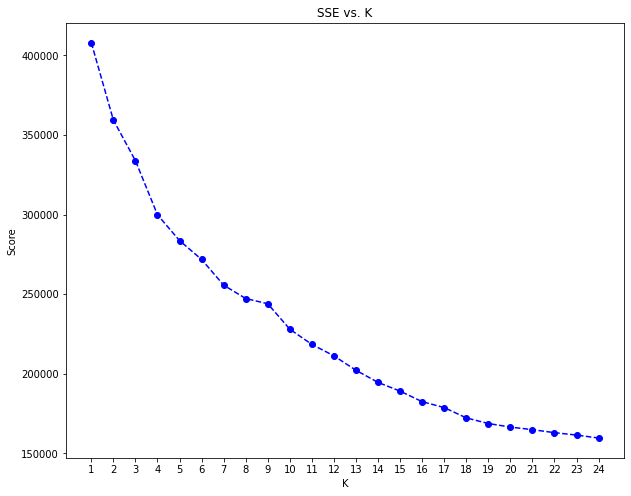

In [ ]:
#Finding the elbow
plt.figure(figsize = (10,8))
plt.plot(k_list, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Score');
plt.xticks(k_list)
plt.title('SSE vs. K');

In [ ]:
#predicting clusters for each users
k_16 = KMeans(16)
cluster_list = k_16.fit_predict(user_scaled)

#changing values in cluster_list so it starts from 1 and ends at 16
cluster_list = cluster_list + 1
user_demographic['cluster'] = cluster_list
user_demographic.head(10)

,user_id,age,gender,income,reward_achieved,transaction,transaction_from_offer,transaction_amount,informational1,informational2,...,discount2,discount3,discount4,transaction_not_from_offer,perc_offer_completed,trans_from_offer_ratio,trans_not_from_offer_ratio,became_member_on,join_year,cluster
0,1,118.0,F,0.0,5.0,9,9,20.40,0,0,...,1,2,3,0,1.0,1.80,0.0,20170212,2017,3
1,2,55.0,F,112000.0,5.0,3,0,77.01,0,0,...,0,0,0,3,1.0,0.00,1.5,20170715,2017,2
2,3,118.0,M,0.0,0.0,6,2,14.30,0,1,...,0,0,0,4,1.0,1.00,2.0,20180712,2018,3
3,4,75.0,F,100000.0,20.0,7,7,159.27,0,1,...,0,0,0,0,1.0,1.75,0.0,20170509,2017,6
4,5,118.0,F,0.0,0.0,3,1,4.65,0,0,...,0,0,0,2,1.0,0.20,0.4,20170804,2017,3
5,6,68.0,M,70000.0,7.0,3,1,57.73,0,0,...,0,0,0,2,1.0,0.25,0.5,20180426,2018,13
6,7,118.0,F,0.0,0.0,0,0,0.00,0,0,...,0,0,0,0,1.0,0.00,0.0,20170925,2017,3
7,8,118.0,M,0.0,0.0,2,2,0.24,0,0,...,1,0,1,0,1.0,0.40,0.0,20171002,2017,3
8,9,65.0,M,53000.0,19.0,3,3,36.43,0,0,...,0,0,1,0,1.0,0.50,0.0,20180209,2018,13
9,10,118.0,F,0.0,5.0,6,4,15.62,0,3,...,0,0,0,2,1.0,1.00,0.5,20161122,2016,3


In [ ]:
user_demographic.groupby('cluster')['user_id'].agg('count')

cluster
1      554
2     2791
3     1784
4      611
5      692
6     1595
7      556
8        6
9      618
10     524
11     649
12     559
13    4586
14     214
15     650
16     611
Name: user_id, dtype: int64

In [ ]:
from scipy import stats
#creating a dataframe containing the column values of cluster demographic
df_cluster = user_demographic.groupby('cluster', as_index = False).agg({
    'age':'mean',
    'gender': lambda x:stats.mode(x)[0],
    'income': 'mean',
    'trans_from_offer_ratio': 'mean',
    'trans_not_from_offer_ratio': 'mean',
    'perc_offer_completed': 'mean',
    'reward_achieved': 'sum',
    'transaction_amount': 'mean',
    'transaction': 'sum',
    'bogo1': 'sum',
    'bogo2': 'sum',
    'bogo3': 'sum',
    'bogo4': 'sum',
    'discount1': 'sum',
    'discount2': 'sum',
    'discount3': 'sum',
    'discount4': 'sum',
    'informational1': 'sum',
    'informational2': 'sum',  })
df_cluster

,cluster,age,gender,income,trans_from_offer_ratio,trans_not_from_offer_ratio,perc_offer_completed,reward_achieved,transaction_amount,transaction,bogo1,bogo2,bogo3,bogo4,discount1,discount2,discount3,discount4,informational1,informational2
0,1,53.146209,M,52397.111913,2.744194,0.400782,1.0,8519.0,140.263484,7895,458.0,4432.0,153.0,377.0,54.0,397.0,533.0,179.0,108.0,301.0
1,2,58.567897,F,73155.499821,0.748256,0.371486,1.0,20839.0,67.234851,12154,928.0,881.0,560.0,1120.0,290.0,1237.0,1189.0,610.0,551.0,1135.0
2,3,117.913117,M,116.591928,1.026504,0.293815,1.0,2511.0,14.887472,9753,964.0,973.0,618.0,923.0,320.0,1105.0,1141.0,569.0,555.0,701.0
3,4,54.013093,M,51273.322422,2.943944,0.450655,1.0,8632.0,132.034697,8995,5223.0,420.0,147.0,410.0,61.0,423.0,652.0,165.0,117.0,309.0
4,5,55.270231,M,53226.878613,2.365222,0.377746,1.0,6506.0,133.322514,8472,463.0,418.0,188.0,402.0,75.0,523.0,521.0,225.0,169.0,4449.0
5,6,61.319749,F,84174.294671,1.543448,0.259331,1.0,34376.0,245.468577,13122,1993.0,2040.0,665.0,1417.0,314.0,1425.0,1966.0,559.0,386.0,665.0
6,7,60.183453,M,59411.870504,2.323531,0.278147,1.0,9128.0,177.580486,6314,401.0,272.0,233.0,313.0,3035.0,374.0,478.0,191.0,179.0,245.0
7,8,76.000000,F,49833.333333,0.000000,999.000000,0.0,0.0,41.768333,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,55.862460,M,53592.233010,2.647087,0.391775,1.0,8430.0,143.809094,8376,467.0,405.0,192.0,4627.0,44.0,431.0,646.0,176.0,122.0,308.0
9,10,59.070611,M,58541.984733,2.257665,0.293162,1.0,5813.0,157.035439,6097,336.0,332.0,183.0,328.0,93.0,388.0,364.0,181.0,2999.0,274.0


### RECOMMENDATION BASED ON CLUSTER

In [ ]:
def get_offer_id(offer_list):
    '''
    INPUT: a list of offer names (bogo1, discount1, etc)
    OUTPUT: a list of offer ids according to the portfolio dataframe
    '''
    offer_names = []
    reverse_offer_name = {v: k for k, v in offer_name_dict.items()}
    for offer in offer_list:
        offer_names.append(reverse_offer_name[offer])
    return offer_names

#create dataframe to check which cluster a user belongs to
check_cluster = user_demographic[['cluster', 'user_id']]

#create cluster - promotion matrix
recom_cluster = df_cluster[['cluster', 'discount1', 'discount2','discount3','discount4', 'bogo1','bogo2','bogo3','bogo4']]
recom_cluster = recom_cluster.set_index('cluster')

#create a dataframe to find out which users should not be given recommendation
offer_or_not = user_demographic[['user_id', 'trans_not_from_offer_ratio']]
offer_or_not = offer_or_not[offer_or_not['trans_not_from_offer_ratio'] > offer_or_not.trans_not_from_offer_ratio.mean()]

In [ ]:
def cluster_recommendation(user_id, top_n=3):
   
    if user_id in offer_or_not['user_id'].tolist():
        return 'do not offer anything'
    else:
        if user_id in check_cluster['user_id']:
            cls = check_cluster[check_cluster['user_id'] == user_id]['cluster'].tolist()[0]
            recommendation = recom_cluster.loc[cls].nlargest(top_n).index.tolist()
        else:
            recommendation = recom_cluster.stack().nlargest(top_n).index.get_level_values(level=1).tolist()
    return get_offer_id(recommendation)


cluster_recommendation(293)

['2298d6c36e964ae4a3e7e9706d1fb8c2',
 'fafdcd668e3743c1bb461111dcafc2a4',
 'f19421c1d4aa40978ebb69ca19b0e20d']

In [ ]:

cluster_recommendation(20)

'do not offer anything'

In [ ]:
# For new user
cluster_recommendation(9999999999)

['fafdcd668e3743c1bb461111dcafc2a4',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 'ae264e3637204a6fb9bb56bc8210ddfd']

## ----------------------------------------------------------------- **END** --------------------------------------------------------------------